<a href="https://colab.research.google.com/github/amitshakarchy/big-data-analysis/blob/main/HW_9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Amit Shakarchy
Github: https://github.com/amitshakarchy/big-data-analysis

## Homework Assignment 9

**Question 1:** Select a short video with at least 3 persons and create a new movie from this video with a face tracker (each person’s face needs to be tracked by a rectangle of a different color) (50pt). See, for example, the video in: https://github.com/ageitgey/face_recognition

**Bonus:** Select a video with at least two animals (dog/cat/lion/tiger...), and create a video with an animal tracker (10pt).

In [5]:
!pip install face_recognition
!pip install opencv-python
!pip install turicreate

     |████████████████████████████████| 92.0 MB 17 kB/s 
     |████████████████████████████████| 3.6 MB 39.3 MB/s 
     |████████████████████████████████| 3.5 MB 39.6 MB/s 
     |████████████████████████████████| 322 kB 53.2 MB/s 
     |████████████████████████████████| 86.4 MB 60 kB/s 
     |████████████████████████████████| 18.3 MB 430 kB/s 
     |████████████████████████████████| 2.9 MB 33.1 MB/s 
     |████████████████████████████████| 20.1 MB 1.4 MB/s 
     |████████████████████████████████| 3.8 MB 39.8 MB/s 
     |████████████████████████████████| 449 kB 50.5 MB/s 
     |████████████████████████████████| 50 kB 7.7 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=aed47686af2e3a153359fde5cad87e7a7aaf6f2dd5ff5fc65c5cfc5934ef03ee
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=acd4b54d7d9

In [8]:
# find a video

! git clone https://github.com/intel-iot-devkit/sample-videos
! ls -l sample-videos/

Cloning into 'sample-videos'...
remote: Enumerating objects: 118, done.
remote: Total 118 (delta 0), reused 0 (delta 0), pack-reused 118
Receiving objects: 100% (118/118), 171.30 MiB | 28.51 MiB/s, done.
Resolving deltas: 100% (39/39), done.
total 156684
-rw-r--r-- 1 root root  9285374 Dec 26 14:45 bolt-detection.mp4
-rw-r--r-- 1 root root 16113270 Dec 26 14:45 bolt-multi-size-detection.mp4
-rw-r--r-- 1 root root   504961 Dec 26 14:45 bottle-detection.mp4
-rw-r--r-- 1 root root  2811553 Dec 26 14:45 car-detection.mp4
-rw-r--r-- 1 root root 13548133 Dec 26 14:45 classroom.mp4
-rw-r--r-- 1 root root  9406029 Dec 26 14:45 face-demographics-walking-and-pause.mp4
-rw-r--r-- 1 root root  6406124 Dec 26 14:45 face-demographics-walking.mp4
-rw-r--r-- 1 root root 17760065 Dec 26 14:45 fruit-and-vegetable-detection.mp4
-rw-r--r-- 1 root root 16788193 Dec 26 14:45 head-pose-face-detection-female-and-male.mp4
-rw-r--r-- 1 root root 15628037 Dec 26 14:45 head-pose-face-detection-female.mp4
-rw-r--r

In [30]:
import face_recognition
import cv2
import numpy as np

#  Select a short video with at least 3 persons - video was taken from sample videos git
VIDEO_PATH = "./sample-videos/preview/face-demographics-walking-and-pause.gif"

input_movie = cv2.VideoCapture(VIDEO_PATH)
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

length

41

In [6]:
!pip install ipython

In [36]:
colors = [(0,0,255),(0,255,0),(255,0,0)]
face_locations = []
face_encodings = []
frame_number = 0

height, width, layers = 0,0,0
frames = []

In [37]:
import base64
# decode images 
def encode_image(imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return Image(data=encoded.decode('ascii'))

In [40]:
# Initialize some variables
from IPython.display import clear_output, Image, display, HTML

while True:
    ret, frame = input_movie.read()
    frame_number += 1
    if not ret:
        print("end of the video :)")
        break

    height, width, layers = frame.shape
    rgb_frame = frame[:, :, ::-1]

    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    if face_locations:
        for i, l in enumerate(face_locations):
            top, right, bottom, left = l
            cv2.rectangle(frame, (left, top), (right, bottom), colors[i], 2)
    
    frames.append(frame)
    img = encode_image(frame)
    display(img)
    # Write the resulting image to the output video file
    print("Writing frame {} / {}".format(frame_number, length))


end of the video :)


In [39]:

#Question 1: create a new movie from this video with a face tracker 
# (each person’s face needs to be tracked by a rectangle of a different color) (50pt). 

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output = cv2.VideoWriter("my_detections_video.mp4", fourcc, 20, (width, height))

for frame in frames:
    output.write(frame)

output.release()
cv2.destroyAllWindows()

##I hope the GIF I added works!!!

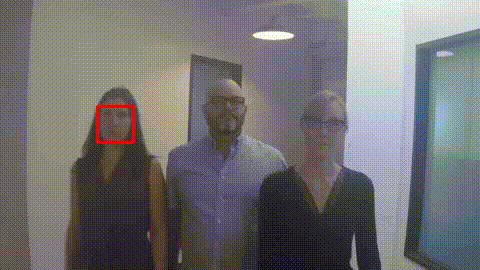

**Question 2:** Create an image classifier that can identify if a person in the image wears a facial mask (45pt). Evaluate the classifier precision (5pt)

In [42]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"aamitshakarchy","key":"58502e08e5c784b7d74c285da6f0a66f"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [43]:
!mkdir ./datasets
!mkdir ./datasets/masks

!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset -p ./datasets/masks/
!mkdir ./datasets/masks/photos
!unzip ./datasets/masks/*.zip  -d ./datasets/masks/photos

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: ./datasets/masks/photos/Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: ./datasets/m

In [48]:
import turicreate as tc
DATASET_PATH = "./datasets/masks/photos/"

test_data = tc.image_analysis.load_images(f"{DATASET_PATH}/Face Mask Dataset/Test/", with_path=True)
train_data = tc.image_analysis.load_images(f"{DATASET_PATH}/Face Mask Dataset/Train/", with_path=True)
train_data

path,image
/content/datasets/masks/photos/Face Mask Datas ...,Height: 82 Width: 82
/content/datasets/masks/photos/Face Mask Datas ...,Height: 25 Width: 25
/content/datasets/masks/photos/Face Mask Datas ...,Height: 50 Width: 50
/content/datasets/masks/photos/Face Mask Datas ...,Height: 53 Width: 53
/content/datasets/masks/photos/Face Mask Datas ...,Height: 37 Width: 37
/content/datasets/masks/photos/Face Mask Datas ...,Height: 78 Width: 78
/content/datasets/masks/photos/Face Mask Datas ...,Height: 116 Width: 116
/content/datasets/masks/photos/Face Mask Datas ...,Height: 32 Width: 32
/content/datasets/masks/photos/Face Mask Datas ...,Height: 57 Width: 57
/content/datasets/masks/photos/Face Mask Datas ...,Height: 56 Width: 56


/usr/local/lib/python3.7/dist-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


,path,image
0,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/10.png,
1,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/100.png,
2,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1004.png,
3,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1005.png,
4,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1006.png,
5,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1007.png,
6,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1008.png,
7,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1011.png,
8,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1012.png,
9,/content/datasets/masks/photos/Face Mask Dataset/Train/WithMask/1018.png,

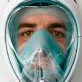
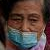
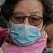
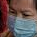
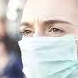
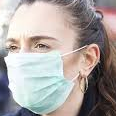
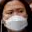
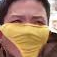
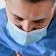
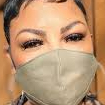
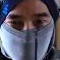
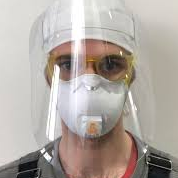
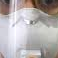
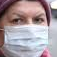
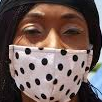
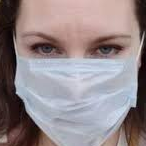
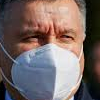
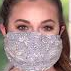
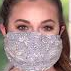
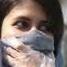
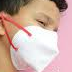
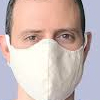
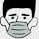
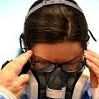
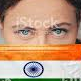
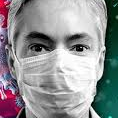
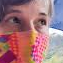
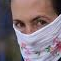
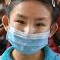
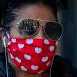
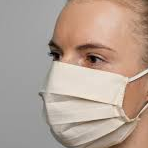
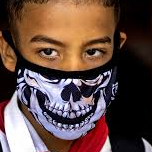
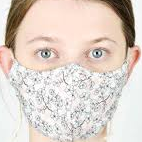
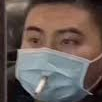
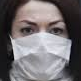
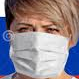
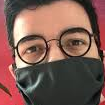
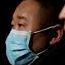
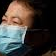
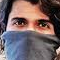
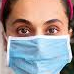
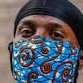
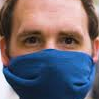
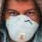
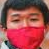
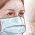
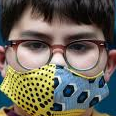
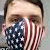
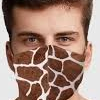
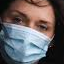
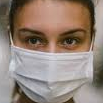
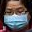
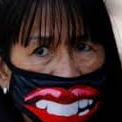
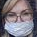
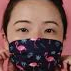
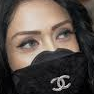
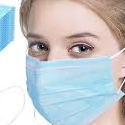
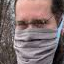
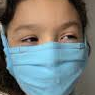
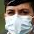
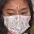
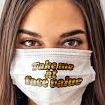
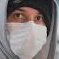
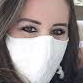
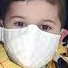
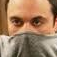
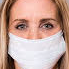
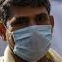
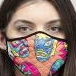
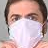
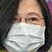
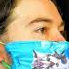
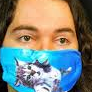
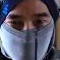
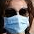
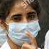
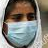
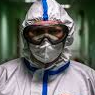
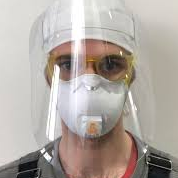
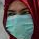
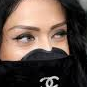
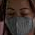
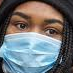
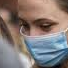
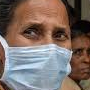
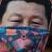
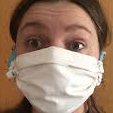
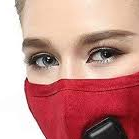
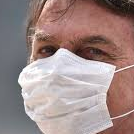
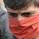
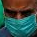
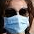

In [45]:
train_data.explore()

In [49]:
test_data['class'] = test_data['path'].apply(lambda p: p.split('/')[-2])
train_data['class'] = train_data['path'].apply(lambda p: p.split('/')[-2])
train_data

path,image,class
/content/datasets/masks/photos/Face Mask Datas ...,Height: 82 Width: 82,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 25 Width: 25,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 50 Width: 50,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 53 Width: 53,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 37 Width: 37,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 78 Width: 78,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 116 Width: 116,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 32 Width: 32,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 57 Width: 57,WithMask
/content/datasets/masks/photos/Face Mask Datas ...,Height: 56 Width: 56,WithMask


In [47]:
cls = tc.image_classifier.create(train_data, target='class')

Download completed: /var/tmp/model_cache/resnet-50-TuriCreate-6.0.h5
Performing feature extraction on resized images...
Completed    64/10000
Completed   128/10000
Completed   192/10000
Completed   256/10000
Completed   320/10000
Completed   384/10000
Completed   448/10000
Completed   512/10000
Completed   576/10000
Completed   640/10000
Completed   704/10000
Completed   768/10000
Completed   832/10000
Completed   896/10000
Completed   960/10000
Completed  1024/10000
Completed  1088/10000
Completed  1152/10000
Completed  1216/10000
Completed  1280/10000
Completed  1344/10000
Completed  1408/10000
Completed  1472/10000
Completed  1536/10000
Completed  1600/10000
Completed  1664/10000
Completed  1728/10000
Completed  1792/10000
Completed  1856/10000
Completed  1920/10000
Completed  1984/10000
Completed  2048/10000
Completed  2112/10000
Completed  2176/10000
Completed  2240/10000
Completed  2304/10000
Completed  2368/10000
Completed  2432/10000
Completed  2496/10000
Completed  2560/10000


Logistic regression:

--------------------------------------------------------

Number of examples          : 9500

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 2048

Number of coefficients      : 2049

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 6        | 0.023625  | 3.474157     | 0.573895          | 0.600000            |

| 1         | 10       | 0.496127  | 5.781588     | 0.920842          | 0.922000            |

| 2         | 12       | 0.496127  | 7.255075     | 0.975053          | 0.978000            |

| 3         | 14       | 0.496127  | 8.718425     | 0.987053          | 0.990000            |

| 4         | 16       | 0.496127  | 10.210177    | 0.991263          | 0.996000            |

| 9         | 26       | 0.496127  | 17.516542    | 0.994842          | 0.996000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [62]:
test_data["preds"] = cls.predict(test_data)
test_data["preds"]

dtype: str
Rows: 992
['WithoutMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'WithMask', 'Wi

In [65]:
from sklearn.metrics import precision_score
precision_score(np.array(test_data['class']), np.array(test_data["preds"]))

0.9909274193548387

## Additional Question for Practice

**Question:** Select a collection of connected images. Create a graph of the links among images or objects in images (42pt). Use graph algorithms to discover interesting insights regarding the images. See, for example, [Figure 2](https://arxiv.org/pdf/1509.00568.pdf) (8pt).